# Programming with Quantum computers - session 1

Notes Link | Youtube Link
--- | ---
[Session 1](#programming-with-quantum-computers---session-1) | [Youtube Playlist](https://www.youtube.com/playlist?list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY)
Episode 1 | [Quantum Pong](https://www.youtube.com/watch?v=a1NZC5rqQD8&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=1)
[Episode 2](#2---how-to-install-qiskit) | [How to Install Qiskit](https://www.youtube.com/watch?v=0j8lJnJ2wAE&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=2)
[Episode 3](#3---hello-world) | [Hello World](https://www.youtube.com/watch?v=RrUTwq5jKM4&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=3)
[Episode 4](#4---building-blocks-of-quantum-circuits) | [Building Blocks of Quantum Circuits](https://www.youtube.com/watch?v=tBnWG_95F9c&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=4)

## 2 - How to Install Qiskit

1. Install anaconda (package management)
2. Create a new environment
2. `pip install qiskit` (may have to install other packages along the way)
3. Create a juptyer notebook
4. Get started using it: `import qiskit as qk`

    `qk.__qiskit_version__` to check the version
5. Create account [here](https://quantum.ibm.com/) and get API token

    `qk.IBMQ.save_account('API_TOKEN')`

    `qk.IBMQ.load_account()`

In [44]:
import qiskit as qk
# qk.__qiskit_version__

# only needs to be run once to save account on your computer:
# qk.IBMQ.save_account(TOKEN)

qk.IBMQ.load_account()

/var/folders/lf/95wrktnj6gxfsmps1mk6k9xr0000gn/T/ipykernel_27591/378925559.py:7: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  qk.IBMQ.load_account()
/var/folders/lf/95wrktnj6gxfsmps1mk6k9xr0000gn/T/ipykernel_27591/378925559.py:7: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  qk.IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

## 3 - Hello World

My Notes:
- `QuantumCircuit` is a class that represents a quantum circuit
- You can keep adding gates and measurements to the circuit (make sure to visualize it with `circuit.draw()`)

    Set `circuit.draw(output='mpl')` to get a matplotlib visualization
- Measurement is done with `circuit.measure(qubit, classical_bit)`

    `qubit` is the qubit to measure and `classical_bit` is the classical bit to store the result

    You can measure multiple qubits at once: `circuit.measure(qr, cr)`
- Actually run the circuit with `execute(circuit, backend)`
    
    You can change the `backend` to a simulator or a real quantum computer
- `result.get_counts(circuit)` returns the counts of the different states that were measured

    plot the results with `plot_histogram(result.get_counts(circuit))`

Note that: Simulating on a classical computer simulates an ideal quantum computer while the IBMQ has some practical imperfections.

In [2]:
# Imports
from qiskit import *

In [3]:
# Create a Quantum Register with 2 qubits
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

In [4]:
# Draw the circuit
circuit.draw() # text-based output
# circuit.draw(output='mpl') # matplotlib drawing

q0_0: 
      
q0_1: 
      
c0: 2/

In [5]:
# Add Hadamard gate
circuit.h(qr[0])
circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

In [6]:
# Controlled x gate (like a logical if statement)
circuit.cx(qr[0], qr[1])
# qr[0] is the control qubit
# qr[1] is the target qubit
circuit.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════

In [7]:
# Measure qubits and store in classical bits
circuit.measure(qr, cr)
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

In [8]:
# Simulate the circuit (on local computer)
simulator = Aer.get_backend('qasm_simulator') # qasm = quantum assembly language
result = execute(circuit, backend=simulator).result()

In [13]:
# Simulate the circuit (on IBMQ)

IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')
# provider.backends() # list of all available backends
qcomp = provider.get_backend('ibmq_qasm_simulator')
job = execute(circuit, backend=qcomp)
result = job.result()

from qiskit.tools.monitor import job_monitor
job_monitor(job) # allows you to see the status of the job in the queue

ibmqfactory.load_account:WARNING:2023-12-23 16:30:50,039: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


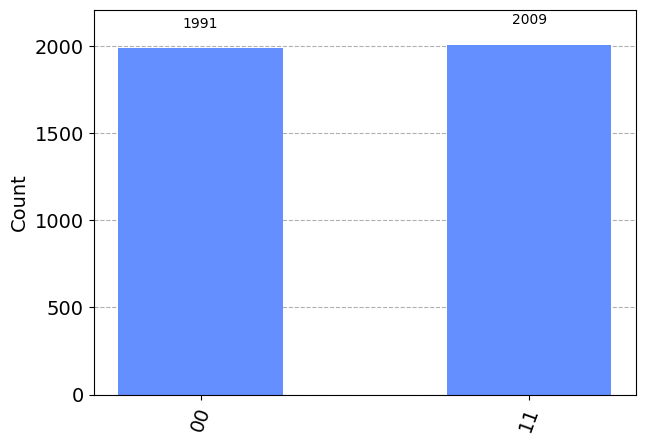

In [14]:
# Visualize results
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

## 4 - Building Blocks of Quantum Circuits

You can understand quantum gates in a few ways:
1. Bra-ket notation (ex: X-gate)

    $$X \ket{0} = \ket{1} $$
2. Linear Algebra: Unitary matrices operating on the state vector (ex: X-gate)

    $$ X \ket{0} = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \ket{1} $$

    $$ X \ket{1} = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \ket{0} $$

    Note that the unitary matrix is a 2x2 matrix of *complex numbers*

3. Bloch sphere: See in the code - plot_bloch_multivector

    **Gates can be represented as rotations on the Bloch sphere**
4. Execute the circuit and measure it

In [4]:
# Imports
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

┌───┐
  q: ┤ X ├
     └───┘
c: 1/═════

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


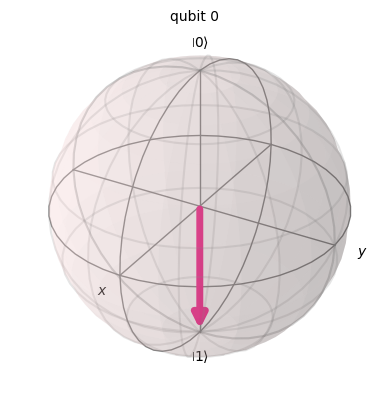

In [3]:
# Demonstrate Bloch Sphere (visualization #3) with a single X-gate
circuit = QuantumCircuit(1, 1)
circuit.x(0)
simulator = Aer.get_backend('statevector_simulator')
# a statevector is a vector that represents the quantum state of the qbit
result = execute(circuit, backend=simulator).result()

display(circuit.draw())
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

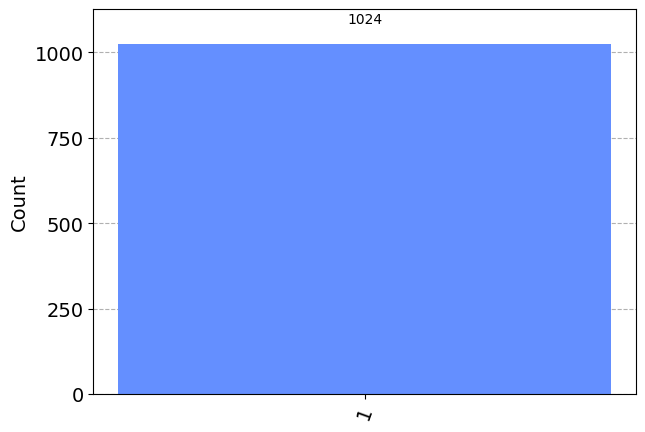

In [7]:
# Execute the circuit (Visualization #4)
circuit.measure([0], [0]) # measure qubit 0 and store in classical bit 0
backend = Aer.get_backend('qasm_simulator')
counts = execute(circuit, backend=backend, shots = 1024).result().get_counts()
plot_histogram(counts)

In [6]:
# Unitary Matrix (visualize #2) with a single X-gate
circuit = QuantumCircuit(1, 1)
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend=simulator).result()

display(circuit.draw())
unitary = result.get_unitary()
print(unitary)

┌───┐
  q: ┤ X ├
     └───┘
c: 1/═════

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))
